## Regular Sales Dashboard for Actionable Insights
This note book demonstrates how to **use PySpark and Databricks to regularly update sales dashboard** for **status monitoring, event effectiveness evaluation**, and other actionable insights.

#### Dataset
An online-retail dataset, provided by databricks, was used for this demo. The dataset can be found in the following directory.

In [0]:
%fs ls "/databricks-datasets/online_retail/data-001"

path name size modificationTime dbfs:/databricks-datasets/online_retail/data-001/data.csv data.csv 5357240 1466388696000

Using the _head_ command, some content of the csv file is displayed for later SQL table buildup.

In [0]:
%fs head --maxBytes=248 "/databricks-datasets/online_retail/data-001/data.csv"

[Truncated to first 248 bytes]
InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/10 8:26,2.55,17850,United Kingdom
536365,71053,WHITE METAL LANTERN,6,12/1/10 8:26,3.39,17850,United Kingdom

#### Data Extraction
**Extract sales data** from the cloud (specified in _file_path_ in the code below).

In [0]:
from pyspark.sql.types import DoubleType, IntegerType, StringType, StructType, StructField

# Define variables used in the code below
file_path = "/databricks-datasets/online_retail/data-001/"
table_name = "raw_sales"
checkpoint_path = "/tmp/pipeline_get_started/_checkpoint/checkpoint1"

schema = StructType(
  [
    StructField("InvoiceNo", StringType(), True),
    StructField("StockCode", StringType(), True),
    StructField("Description", StringType(), True),
    StructField("Quantity", IntegerType(), True),
    StructField("InvoiceDate", StringType(), True),
    StructField("UnitPrice", DoubleType(), True),
    StructField("CustomerID", StringType(), True),
    StructField("Country", StringType(), True)
  ]
)

(spark.readStream
  .format("cloudFiles")
  .schema(schema)
  .option("cloudFiles.format", "csv")
  .option("sep",",")
  .load(file_path)
  .writeStream
  .option("checkpointLocation", checkpoint_path)
  .trigger(availableNow=True)
  .toTable(table_name)
)

#### Load Data 
Use **Spark SQL** to create table _sales_data_ and insert records.

In [0]:
%sql
CREATE OR REPLACE TABLE
  sales_data (
    InvoiceNo STRING,
    StockCode STRING,
    Description STRING,
    Quantity INTEGER,
    InvoiceDate STRING,
    UnitPrice DOUBLE,
    CustomerID STRING,
    Country STRING);

INSERT INTO
  sales_data
SELECT
  InvoiceNo,
  StockCode,
  Description,
  Quantity,
  InvoiceDate,
  UnitPrice,
  CustomerID,
  Country
FROM
  raw_sales

num_affected_rows num_inserted_rows 65500 65500

#### Save Table for Future Data Retrieval
The table with data inserted is saved, here, as _sales_data_table_saved_, which can retrived in the future for other applications.

In [0]:
%sql
SELECT InvoiceNo, StockCode, Description, Quantity, 
       InvoiceDate, UnitPrice, CustomerID
FROM sales_data

InvoiceNo StockCode Description Quantity InvoiceDate UnitPrice CustomerID InvoiceNo StockCode Description null InvoiceDate null CustomerID 536365 85123A WHITE HANGING HEART T-LIGHT HOLDER 6 12/1/10 8:26 2.55 17850 536365 71053 WHITE METAL LANTERN 6 12/1/10 8:26 3.39 17850 536365 84406B CREAM CUPID HEARTS COAT HANGER 8 12/1/10 8:26 2.75 17850 536365 84029G KNITTED UNION FLAG HOT WATER BOTTLE 6 12/1/10 8:26 3.39 17850 536365 84029E RED WOOLLY HOTTIE WHITE HEART. 6 12/1/10 8:26 3.39 17850 536365 22752 SET 7 BABUSHKA NESTING BOXES 2 12/1/10 8:26 7.65 17850 536365 21730 GLASS STAR FROSTED T-LIGHT HOLDER 6 12/1/10 8:26 4.25 17850 536366 22633 HAND WARMER UNION JACK 6 12/1/10 8:28 1.85 17850 536366 22632 HAND WARMER RED POLKA DOT 6 12/1/10 8:28 1.85 17850 536367 84879 ASSORTED COLOUR BIRD ORNAMENT 32 12/1/10 8:34 1.69 13047 536367 22745 POPPY'S PLAYHOUSE BEDROOM 6 12/1/10 8:34 2.1 13047 536367 22748 POPPY'S PLAYHOUSE KITCHEN 6 12/1/10 8:34 2.1 13047 536367 22749 FELTCRAFT PRINCESS CHARLOTTE DOLL 8 12/1/10 8:34 3.75 13047 536367 22310 IVORY KNITTED MUG COSY 6 12/1/10 8:34 1.65 13047 536367 84969 BOX OF 6 ASSORTED COLOUR TEASPOONS 6 12/1/10 8:34 4.25 13047 536367 22623 BOX OF VINTAGE JIGSAW BLOCKS 3 12/1/10 8:34 4.95 13047 536367 22622 BOX OF VINTAGE ALPHABET BLOCKS 2 12/1/10 8:34 9.95 13047 536367 21754 HOME BUILDING BLOCK WORD 3 12/1/10 8:34 5.95 13047 536367 21755 LOVE BUILDING BLOCK WORD 3 12/1/10 8:34 5.95 13047 536367 21777 RECIPE BOX WITH METAL HEART 4 12/1/10 8:34 7.95 13047 536367 48187 DOORMAT NEW ENGLAND 4 12/1/10 8:34 7.95 13047 536368 22960 JAM MAKING SET WITH JARS 6 12/1/10 8:34 4.25 13047 536368 22913 RED COAT RACK PARIS FASHION 3 12/1/10 8:34 4.95 13047 536368 22912 YELLOW COAT RACK PARIS FASHION 3 12/1/10 8:34 4.95 13047 536368 22914 BLUE COAT RACK PARIS FASHION 3 12/1/10 8:34 4.95 13047 536369 21756 BATH BUILDING BLOCK WORD 3 12/1/10 8:35 5.95 13047 536370 22728 ALARM CLOCK BAKELIKE PINK 24 12/1/10 8:45 3.75 12583 536370 22727 ALARM CLOCK BAKELIKE RED 24 12/1/10 8:45 3.75 12583 536370 22726 ALARM CLOCK BAKELIKE GREEN 12 12/1/10 8:45 3.75 12583 536370 21724 PANDA AND BUNNIES STICKER SHEET 12 12/1/10 8:45 0.85 12583 536370 21883 STARS GIFT TAPE 24 12/1/10 8:45 0.65 12583 536370 10002 INFLATABLE POLITICAL GLOBE 48 12/1/10 8:45 0.85 12583 536370 21791 VINTAGE HEADS AND TAILS CARD GAME 24 12/1/10 8:45 1.25 12583 536370 21035 SET/2 RED RETROSPOT TEA TOWELS 18 12/1/10 8:45 2.95 12583 536370 22326 ROUND SNACK BOXES SET OF4 WOODLAND 24 12/1/10 8:45 2.95 12583 536370 22629 SPACEBOY LUNCH BOX 24 12/1/10 8:45 1.95 12583 536370 22659 LUNCH BOX I LOVE LONDON 24 12/1/10 8:45 1.95 12583 536370 22631 CIRCUS PARADE LUNCH BOX 24 12/1/10 8:45 1.95 12583 536370 22661 CHARLOTTE BAG DOLLY GIRL DESIGN 20 12/1/10 8:45 0.85 12583 536370 21731 RED TOADSTOOL LED NIGHT LIGHT 24 12/1/10 8:45 1.65 12583 536370 22900 SET 2 TEA TOWELS I LOVE LONDON 24 12/1/10 8:45 2.95 12583 536370 21913 VINTAGE SEASIDE JIGSAW PUZZLES 12 12/1/10 8:45 3.75 12583 536370 22540 MINI JIGSAW CIRCUS PARADE 24 12/1/10 8:45 0.42 12583 536370 22544 MINI JIGSAW SPACEBOY 24 12/1/10 8:45 0.42 12583 536370 22492 MINI PAINT SET VINTAGE 36 12/1/10 8:45 0.65 12583 536370 POST POSTAGE 3 12/1/10 8:45 18.0 12583 536371 22086 PAPER CHAIN KIT 50'S CHRISTMAS 80 12/1/10 9:00 2.55 13748 536372 22632 HAND WARMER RED POLKA DOT 6 12/1/10 9:01 1.85 17850 536372 22633 HAND WARMER UNION JACK 6 12/1/10 9:01 1.85 17850 536373 85123A WHITE HANGING HEART T-LIGHT HOLDER 6 12/1/10 9:02 2.55 17850 536373 71053 WHITE METAL LANTERN 6 12/1/10 9:02 3.39 17850 536373 84406B CREAM CUPID HEARTS COAT HANGER 8 12/1/10 9:02 2.75 17850 536373 20679 EDWARDIAN PARASOL RED 6 12/1/10 9:02 4.95 17850 536373 37370 RETRO COFFEE MUGS ASSORTED 6 12/1/10 9:02 1.06 17850 536373 21871 SAVE THE PLANET MUG 6 12/1/10 9:02 1.06 17850 536373 21071 VINTAGE BILLBOARD DRINK ME MUG 6 12/1/10 9:02 1.06 17850 536373 21068 VINTAGE BILLBOARD LOVE/HATE MUG 6 12/1/10 9:02 1.06 17850 536373 82483 WOOD 2 DRAWER CABINET WHITE FINISH 2 12/1/10 9

In [0]:
_sqldf.write.mode("overwrite").format("delta").saveAsTable("sales_data_table_saved")

#### Retrive Data With As Of Date And Transform Data
One exciting feature of Delta Lake is **Time Travel**, where we can retrieve data at a given time point. As sales record can keep adding up, **this allows us to aceess sales records at previous time points**. 
Here, table as of "2023-11-16 00:28:39.0" was queried and we add the column of _Revenue_, which equals the _Quantity_ purchased multiplied by _UnitPrice_ of the product. The resulted table is **displayed from record with the highest revenue generated to the lowest**.

In [0]:
%sql
SELECT InvoiceNo, StockCode, Description, Quantity, 
       InvoiceDate, UnitPrice, CustomerID, Quantity*UnitPrice AS Revenue
FROM sales_data_table_saved TIMESTAMP AS OF "2023-11-16 00:28:39.0"
ORDER BY Revenue DESC

InvoiceNo StockCode Description Quantity InvoiceDate UnitPrice CustomerID Revenue 541431 23166 MEDIUM CERAMIC TOP STORAGE JAR 74215 1/18/11 10:01 1.04 12346 77183.6 537632 AMAZONFEE AMAZON FEE 1 12/7/10 15:08 13541.33 null 13541.33 540815 21108 FAIRY CAKE FLANNEL ASSORTED COLOUR 3114 1/11/11 12:55 2.1 15749 6539.400000000001 540815 85123A WHITE HANGING HEART T-LIGHT HOLDER 1930 1/11/11 12:55 2.55 15749 4921.5 540818 48185 DOORMAT FAIRY CAKE 670 1/11/11 12:57 6.75 15749 4522.5 540689 22470 HEART OF WICKER LARGE 1284 1/11/11 8:43 3.21 17450 4121.64 537659 21623 VINTAGE UNION JACK MEMOBOARD 600 12/7/10 16:43 6.38 18102 3828.0 537899 22328 ROUND SNACK BOXES SET OF 4 FRUITS 1488 12/9/10 10:44 2.55 12755 3794.3999999999996 540815 21175 GIN + TONIC DIET METAL SIGN 2000 1/11/11 12:55 1.85 15749 3700.0 540818 47556B TEA TIME TEA TOWELS 1300 1/11/11 12:57 2.55 15749 3314.9999999999995 540689 85123A WHITE HANGING HEART T-LIGHT HOLDER 1010 1/11/11 8:43 3.24 17450 3272.4 538191 22423 REGENCY CAKESTAND 3 TIER 272 12/10/10 10:49 10.95 15061 2978.3999999999996 537659 82484 WOOD BLACK BOARD ANT WHITE FINISH 600 12/7/10 16:43 4.78 18102 2868.0 540689 21733 RED HANGING HEART T-LIGHT HOLDER 860 1/11/11 8:43 3.24 17450 2786.4 540689 22469 HEART OF WICKER SMALL 1356 1/11/11 8:43 1.93 17450 2617.08 537657 21623 VINTAGE UNION JACK MEMOBOARD 408 12/7/10 16:42 6.38 18102 2603.04 537659 22833 HALL CABINET WITH 3 DRAWERS 72 12/7/10 16:43 32.69 18102 2353.68 537659 22189 CREAM HEART CARD HOLDER 1008 12/7/10 16:43 2.31 18102 2328.48 537659 22188 BLACK HEART CARD HOLDER 1008 12/7/10 16:43 2.31 18102 2328.48 539101 22693 GROW A FLYTRAP OR SUNFLOWER IN TIN 2400 12/16/10 10:35 0.94 16029 2256.0 537657 22188 BLACK HEART CARD HOLDER 972 12/7/10 16:42 2.31 18102 2245.32 537657 22189 CREAM HEART CARD HOLDER 972 12/7/10 16:42 2.31 18102 2245.32 539750 22423 REGENCY CAKESTAND 3 TIER 79 12/21/10 15:40 25.49 null 2013.7099999999998 539750 22114 HOT WATER BOTTLE TEA AND SYMPATHY 210 12/21/10 15:40 9.32 null 1957.2 537657 82484 WOOD BLACK BOARD ANT WHITE FINISH 408 12/7/10 16:42 4.78 18102 1950.24 538063 22830 UTILTY CABINET WITH HOOKS 96 12/9/10 13:44 19.94 18102 1914.2400000000002 540175 79321 CHILLI LIGHTS 480 1/5/11 12:37 3.98 16532 1910.4 539750 84029E RED WOOLLY HOTTIE WHITE HEART. 215 12/21/10 15:40 8.47 null 1821.0500000000002 541220 22423 REGENCY CAKESTAND 3 TIER 160 1/14/11 14:11 10.95 14156 1752.0 539750 21479 WHITE SKULL HOT WATER BOTTLE 197 12/21/10 15:40 8.47 null 1668.5900000000001 540698 21621 VINTAGE UNION JACK BUNTING 186 1/11/11 9:24 8.87 17450 1649.82 536477 21137 BLACK RECORD COVER FRAME 480 12/1/10 12:27 3.39 16210 1627.2 537256 21137 BLACK RECORD COVER FRAME 480 12/6/10 11:06 3.39 16210 1627.2 539257 21137 BLACK RECORD COVER FRAME 480 12/16/10 14:29 3.39 16210 1627.2 536785 22423 REGENCY CAKESTAND 3 TIER 144 12/2/10 15:22 10.95 15061 1576.8 536830 21915 RED HARMONICA IN BOX 1400 12/2/10 17:38 1.06 16754 1484.0 537235 22622 BOX OF VINTAGE ALPHABET BLOCKS 156 12/6/10 9:45 8.5 17381 1326.0 538877 22423 REGENCY CAKESTAND 3 TIER 52 12/14/10 15:29 25.49 null 1325.48 536970 22423 REGENCY CAKESTAND 3 TIER 120 12/3/10 13:12 10.95 17949 1314.0 539856 M Manual 1 12/22/10 14:41 1298.4 null 1298.4 539109 85123A WHITE HANGING HEART T-LIGHT HOLDER 500 12/16/10 11:07 2.55 16013 1275.0 541220 22838 3 TIER CAKE TIN RED AND CREAM 96 1/14/11 14:11 12.75 14156 1224.0 540785 84997C BLUE 3 PIECE POLKADOT CUTLERY SET 360 1/11/11 11:39 3.39 12557 1220.4 540785 84997D PINK 3 PIECE POLKADOT CUTLERY SET 360 1/11/11 11:39 3.39 12557 1220.4 537456 22470 HEART OF WICKER LARGE 378 12/7/10 9:43 3.21 17450 1213.3799999999999 538848 85232B SET OF 3 BABUSHKA STACKING TINS 240 12/14/10 13:28 4.95 17404 1188.0 536584 84029E RED WOOLLY HOTTIE WHITE HEART. 384 12/1/10 16:22 2.95 13777 1132.8000000000002 540160 22379 RECYCLING BAG RETROSPOT 600 1/5/11 11:50 1.85 15769 1110.0 539750 84029G KNITTED UNION FLAG HOT WATER BOTTLE 129 12/21/10 15:40 8.47 null 1092.63 540267 22720 SET OF 3 CAKE 

#### Filter sales records of interest

**Sales records of the year 2011 are filtered** using _regular expression_ because the _InvoiceDate_ is of _String_ format. Since the amount of data decreases, **the dataframe is transformed into Pandas dataframe** for visualisation. In a database database where sales records are continuously updated, the ***sales records of the current year*** can be filtered to build ***a dashboard of products generating the highest revenue***. 

In [0]:
from pyspark.sql.functions import instr
#fileter yearly sales record
Sales_df_year = _sqldf.filter( _sqldf["InvoiceDate"].rlike(".*/.*/11.*")).toPandas()
print("Shape of yearly sales record dataframe: ")
Sales_df_year.shape

Shape of yearly sales record dataframe: 


(23018, 8)

The **revenue generated by each product was aggregated** and the revenue table was displayed from product generating the most revenue to the least.

In [0]:
ProdRev_year = Sales_df_year.groupby(['StockCode','Description'])['Revenue'].sum().reset_index()
ProdRev_year = ProdRev_year.sort_values(by=['Revenue'], ascending = False)
TopRevProd_year = ProdRev_year.head(10)
TopRevProd_year

StockCode                         Description   Revenue
2151    85123A  WHITE HANGING HEART T-LIGHT HOLDER  13313.72
2423       DOT                      DOTCOM POSTAGE   9506.67
1088     22423            REGENCY CAKESTAND 3 TIER   8223.05
256      21108  FAIRY CAKE FLANNEL ASSORTED COLOUR   6687.22
1732     48185                  DOORMAT FAIRY CAKE   5043.64
1819     79321                       CHILLI LIGHTS   5008.77
1131     22470               HEART OF WICKER LARGE   4876.32
295      21175         GIN + TONIC DIET METAL SIGN   4387.64
1130     22469               HEART OF WICKER SMALL   4114.07
602      21733    RED HANGING HEART T-LIGHT HOLDER   3853.05

#### Dashboard of Top Revenue Gerenating Products
Finally, a **dashboard of top 10 revenue generating products** is displayed below, with a bar chart show showing the trend and table showing product description and detailed numbers. **The dashboard can updated regularly** through out the year to **monitor sales status for actionable insights**.

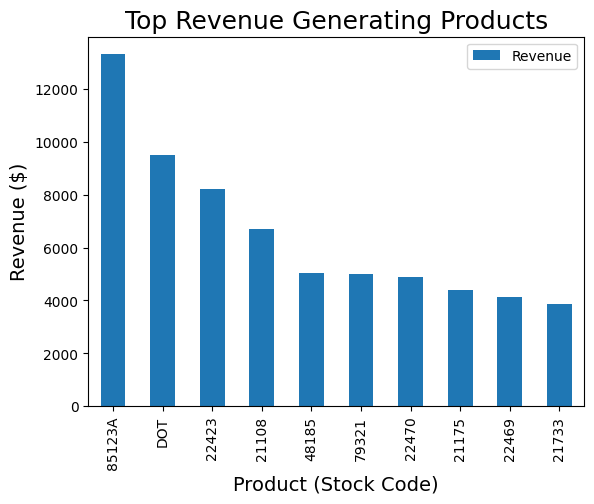

StockCode                        Description  Revenue
   85123A WHITE HANGING HEART T-LIGHT HOLDER 13313.72
      DOT                     DOTCOM POSTAGE  9506.67
    22423           REGENCY CAKESTAND 3 TIER  8223.05
    21108 FAIRY CAKE FLANNEL ASSORTED COLOUR  6687.22
    48185                 DOORMAT FAIRY CAKE  5043.64
    79321                      CHILLI LIGHTS  5008.77
    22470              HEART OF WICKER LARGE  4876.32
    21175        GIN + TONIC DIET METAL SIGN  4387.64
    22469              HEART OF WICKER SMALL  4114.07
    21733   RED HANGING HEART T-LIGHT HOLDER  3853.05


In [0]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

TopRevProd_year_rev = TopRevProd_year[['StockCode', 'Description', 'Revenue']]
TopRevProd_year_rev.index = TopRevProd_year['StockCode']
TopRevProd_year_rev.plot(kind='bar')
plt.title('Top Revenue Generating Products',fontsize = 18)
plt.ylabel('Revenue ($)',fontsize = 14)
plt.xlabel('Product (Stock Code)',fontsize = 14)
plt.show()

print(TopRevProd_year.to_string(index=False))

#### Data Quality Validation
Below are validation code for data quality check.

In [0]:
# Check data completeness
OtherRecord = _sqldf.filter( _sqldf["InvoiceDate"].rlike(".*InvoiceDate.*")).toPandas()
Sales_2011 = _sqldf.filter( _sqldf["InvoiceDate"].rlike(".*/.*/11.*")).toPandas()
Sales_2010 = _sqldf.filter( _sqldf["InvoiceDate"].rlike(".*/.*/10.*")).toPandas()
SourceDataCount = _sqldf.count()

assert Sales_2010.shape[0]+Sales_2011.shape[0]+OtherRecord.shape[0] ==SourceDataCount

# Check Aggregation resutls
ProductSales_df = Sales_2011[Sales_2011['StockCode']=='85123A']
ProductSales = ProductSales_df['Revenue'].sum()
assert abs(ProductSales - TopRevProd_year['Revenue'].iloc[0]) <= 0.00001
